## Testando método poly1d

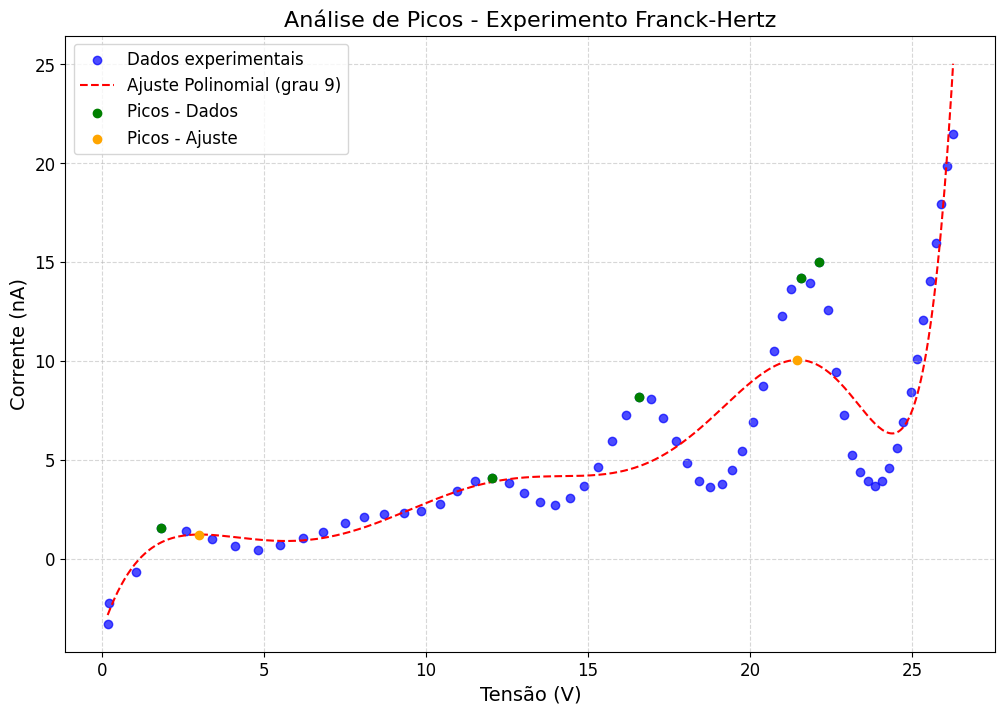

Picos nos dados experimentais (tensão, corrente):
Tensão: 1.83 V, Corrente: 1.58 nA
Tensão: 12.04 V, Corrente: 4.10 nA
Tensão: 16.57 V, Corrente: 8.19 nA
Tensão: 21.57 V, Corrente: 14.22 nA
Tensão: 22.14 V, Corrente: 15.00 nA

Picos na curva ajustada (tensão, corrente):
Tensão: 3.00 V, Corrente: 1.25 nA
Tensão: 21.46 V, Corrente: 10.07 nA


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Função para ajuste polinomial
def ajustar_polinomio(x, y, grau):
    coeficientes = np.polyfit(x, y, grau)
    polinomio = np.poly1d(coeficientes)
    return polinomio, coeficientes

# Carregar dados (substitua pelo seu arquivo CSV)
file_path = "A_FIXO_2.csv"
df = pd.read_csv(file_path, skiprows=1)  # Ignorar cabeçalhos nas primeiras linhas, se necessário

# Extrair colunas de tensão e corrente
try:
    # Limpeza e conversão das colunas
    tensao = df.iloc[:, 2].astype(str).str.replace(',', '.').str.strip()
    corrente = df.iloc[:, 1].astype(str).str.replace(',', '.').str.strip()
    
    # Converter para numérico
    tensao = pd.to_numeric(tensao, errors='coerce').dropna()
    corrente = pd.to_numeric(corrente, errors='coerce').dropna()
except IndexError:
    print("Erro: O arquivo não possui colunas suficientes. Verifique o formato dos dados.")
    exit()

# Verificar se as colunas não estão vazias
if tensao.empty or corrente.empty:
    print("Erro: As colunas de tensão ou corrente estão vazias. Verifique o arquivo de entrada.")
    exit()

# Ajuste polinomial
grau_polinomio = 9
polinomio, coeficientes = ajustar_polinomio(tensao, corrente, grau_polinomio)

# Gerar curva ajustada
x_fit = np.linspace(tensao.min(), tensao.max(), 500)
y_fit = polinomio(x_fit)

# Encontrar picos nos dados experimentais
picos_dados, _ = find_peaks(corrente, height=0)  # Altura mínima pode ser ajustada
picos_ajuste, _ = find_peaks(y_fit, height=0)

# Visualização dos resultados
plt.figure(figsize=(12, 8))

# Plot dos dados experimentais
plt.scatter(tensao, corrente, label='Dados experimentais', color='blue', alpha=0.7)

# Plot da curva ajustada
plt.plot(x_fit, y_fit, label=f'Ajuste Polinomial (grau {grau_polinomio})', color='red', linestyle='--')

# Marcar picos nos dados experimentais
if len(picos_dados) > 0:
    plt.scatter(tensao.iloc[picos_dados], corrente.iloc[picos_dados], color='green', label='Picos - Dados', zorder=5)

# Marcar picos na curva ajustada
if len(picos_ajuste) > 0:
    plt.scatter(x_fit[picos_ajuste], y_fit[picos_ajuste], color='orange', label='Picos - Ajuste', zorder=5)

# Configurações do gráfico
plt.title('Análise de Picos - Experimento Franck-Hertz', fontsize=16)
plt.xlabel('Tensão (V)', fontsize=14)
plt.ylabel('Corrente (nA)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Salvar o gráfico
plt.savefig("analise_picos.png", dpi=300)
plt.show()

# Exibir posições dos picos
print("Picos nos dados experimentais (tensão, corrente):")
if len(picos_dados) > 0:
    for i in picos_dados:
        print(f"Tensão: {tensao.iloc[i]:.2f} V, Corrente: {corrente.iloc[i]:.2f} nA")
else:
    print("Nenhum pico encontrado nos dados experimentais.")

print("\nPicos na curva ajustada (tensão, corrente):")
if len(picos_ajuste) > 0:
    for i in picos_ajuste:
        print(f"Tensão: {x_fit[i]:.2f} V, Corrente: {y_fit[i]:.2f} nA")
else:
    print("Nenhum pico encontrado na curva ajustada.")


## Testando Método do Spline Cubico

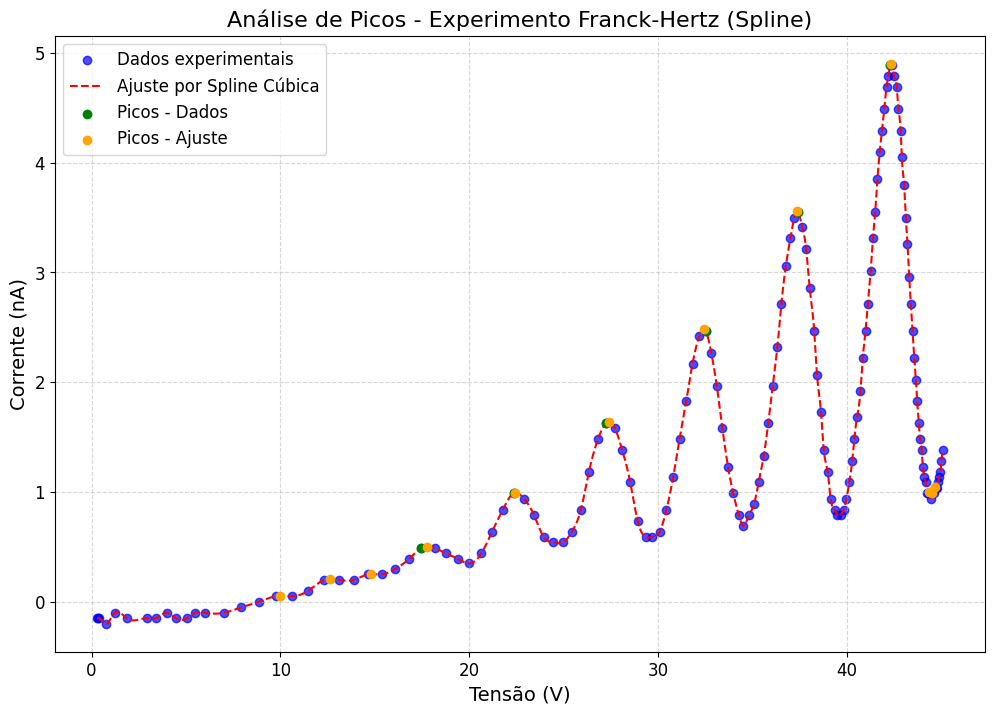

Picos nos dados experimentais (tensão, corrente):
Tensão: 17.47 V, Corrente: 0.49 nA
Tensão: 22.35 V, Corrente: 0.99 nA
Tensão: 27.26 V, Corrente: 1.63 nA
Tensão: 32.51 V, Corrente: 2.47 nA
Tensão: 37.42 V, Corrente: 3.55 nA
Tensão: 42.30 V, Corrente: 4.89 nA
Média da distância entre os picos nos dados experimentais: 4.97 V

Picos na curva ajustada (tensão, corrente):
Tensão: 9.98 V, Corrente: 0.05 nA
Tensão: 12.62 V, Corrente: 0.21 nA
Tensão: 14.82 V, Corrente: 0.25 nA
Tensão: 17.77 V, Corrente: 0.50 nA
Tensão: 22.43 V, Corrente: 0.99 nA
Tensão: 27.41 V, Corrente: 1.64 nA
Tensão: 32.43 V, Corrente: 2.48 nA
Tensão: 37.35 V, Corrente: 3.56 nA
Tensão: 42.33 V, Corrente: 4.90 nA
Tensão: 44.34 V, Corrente: 1.00 nA
Tensão: 44.52 V, Corrente: 0.99 nA
Tensão: 44.66 V, Corrente: 1.05 nA
Média da distância entre os picos na curva ajustada: 3.15 V


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.interpolate import CubicSpline

# Carregar dados (substitua pelo seu arquivo CSV)
file_path = "R_FIXO_1.csv"
df = pd.read_csv(file_path, skiprows=1)  # Ignorar cabeçalhos nas primeiras linhas, se necessário

# Extrair colunas de tensão e corrente
try:
    # Limpeza e conversão das colunas
    tensao = df.iloc[:, 2].astype(str).str.replace(',', '.').str.strip()
    corrente = df.iloc[:, 1].astype(str).str.replace(',', '.').str.strip()
    
    # Converter para numérico
    tensao = pd.to_numeric(tensao, errors='coerce')
    corrente = pd.to_numeric(corrente, errors='coerce')
    
    # Remover NaNs
    valid_data = ~tensao.isna() & ~corrente.isna()
    tensao = tensao[valid_data]
    corrente = corrente[valid_data]
    
    # Remover duplicatas em tensão
    tensao, unique_indices = np.unique(tensao, return_index=True)
    corrente = corrente.iloc[unique_indices].reset_index(drop=True)
except IndexError:
    print("Erro: O arquivo não possui colunas suficientes. Verifique o formato dos dados.")
    exit()

# Verificar se as colunas não estão vazias
if len(tensao) < 2 or len(corrente) < 2:
    print("Erro: Dados insuficientes após limpeza. Verifique o arquivo de entrada.")
    exit()

# Interpolação spline cúbica
spline = CubicSpline(tensao, corrente)

# Gerar pontos para a curva ajustada
x_fit = np.linspace(tensao.min(), tensao.max(), 1000)
y_fit = spline(x_fit)

# Encontrar picos nos dados experimentais
picos_dados, _ = find_peaks(corrente, height=0)
picos_ajuste, _ = find_peaks(y_fit, height=0)

# Calcular a média da distância entre os picos experimentais
if len(picos_dados) > 1:
    distancias_dados = np.diff(tensao[picos_dados])
    media_distancia_dados = np.mean(distancias_dados)
else:
    media_distancia_dados = None

# Calcular a média da distância entre os picos ajustados
if len(picos_ajuste) > 1:
    distancias_ajuste = np.diff(x_fit[picos_ajuste])
    media_distancia_ajuste = np.mean(distancias_ajuste)
else:
    media_distancia_ajuste = None

# Visualização dos resultados
plt.figure(figsize=(12, 8))

# Plot dos dados experimentais
plt.scatter(tensao, corrente, label='Dados experimentais', color='blue', alpha=0.7)

# Plot da curva ajustada (Spline Cúbica)
plt.plot(x_fit, y_fit, label='Ajuste por Spline Cúbica', color='red', linestyle='--')

# Marcar picos nos dados experimentais
if len(picos_dados) > 0:
    plt.scatter(tensao[picos_dados], corrente[picos_dados], color='green', label='Picos - Dados', zorder=5)

# Marcar picos na curva ajustada
if len(picos_ajuste) > 0:
    plt.scatter(x_fit[picos_ajuste], y_fit[picos_ajuste], color='orange', label='Picos - Ajuste', zorder=5)

# Configurações do gráfico
plt.title('Análise de Picos - Experimento Franck-Hertz (Spline)', fontsize=16)
plt.xlabel('Tensão (V)', fontsize=14)
plt.ylabel('Corrente (nA)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Salvar o gráfico
plt.savefig("analise_picos_spline.png", dpi=300)
plt.show()

# Exibir resultados no terminal
print("Picos nos dados experimentais (tensão, corrente):")
if len(picos_dados) > 0:
    for i in picos_dados:
        print(f"Tensão: {tensao[i]:.2f} V, Corrente: {corrente[i]:.2f} nA")
else:
    print("Nenhum pico encontrado nos dados experimentais.")

if media_distancia_dados is not None:
    print(f"Média da distância entre os picos nos dados experimentais: {media_distancia_dados:.2f} V")
else:
    print("Não foi possível calcular a média da distância entre os picos experimentais.")

print("\nPicos na curva ajustada (tensão, corrente):")
if len(picos_ajuste) > 0:
    for i in picos_ajuste:
        print(f"Tensão: {x_fit[i]:.2f} V, Corrente: {y_fit[i]:.2f} nA")
else:
    print("Nenhum pico encontrado na curva ajustada.")

if media_distancia_ajuste is not None:
    print(f"Média da distância entre os picos na curva ajustada: {media_distancia_ajuste:.2f} V")
else:
    print("Não foi possível calcular a média da distância entre os picos ajustados.")


## Generalizando para todos os arquivos da pasta

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.interpolate import CubicSpline

# Função para processar um arquivo CSV
def processar_csv(file_path):
    print(f"\nProcessando arquivo: {file_path}")
    df = pd.read_csv(file_path, skiprows=1)

    # Extrair colunas de tensão e corrente
    try:
        tensao = df.iloc[:, 2].astype(str).str.replace(',', '.').str.strip()
        corrente = df.iloc[:, 1].astype(str).str.replace(',', '.').str.strip()
        tensao = pd.to_numeric(tensao, errors='coerce')
        corrente = pd.to_numeric(corrente, errors='coerce')
        valid_data = ~tensao.isna() & ~corrente.isna()
        tensao = tensao[valid_data]
        corrente = corrente[valid_data]
        tensao, unique_indices = np.unique(tensao, return_index=True)
        corrente = corrente.iloc[unique_indices].reset_index(drop=True)
    except IndexError:
        print(f"Erro: O arquivo {file_path} não possui colunas suficientes.")
        return

    if len(tensao) < 2 or len(corrente) < 2:
        print(f"Erro: Dados insuficientes no arquivo {file_path}.")
        return

    # Interpolação spline cúbica
    spline = CubicSpline(tensao, corrente)
    x_fit = np.linspace(tensao.min(), tensao.max(), 1000)
    y_fit = spline(x_fit)

    # Encontrar picos
    picos_dados, _ = find_peaks(corrente, height=0)
    picos_ajuste, _ = find_peaks(y_fit, height=0)

    # Calcular médias das distâncias entre picos
    if len(picos_dados) > 1:
        distancias_dados = np.diff(tensao[picos_dados])
        media_distancia_dados = np.mean(distancias_dados)
    else:
        media_distancia_dados = None

    if len(picos_ajuste) > 1:
        distancias_ajuste = np.diff(x_fit[picos_ajuste])
        media_distancia_ajuste = np.mean(distancias_ajuste)
    else:
        media_distancia_ajuste = None

    # Salvar resultados em um arquivo CSV
    output_csv = os.path.splitext(file_path)[0] + "_results.csv"
    resultados = {
        "Pico (Tensão - Dados)": tensao[picos_dados] if len(picos_dados) > 0 else [],
        "Pico (Corrente - Dados)": corrente[picos_dados] if len(picos_dados) > 0 else [],
        "Média Distância Picos - Dados (V)": [media_distancia_dados] if media_distancia_dados is not None else [],
        "Pico (Tensão - Ajuste)": x_fit[picos_ajuste] if len(picos_ajuste) > 0 else [],
        "Pico (Corrente - Ajuste)": y_fit[picos_ajuste] if len(picos_ajuste) > 0 else [],
        "Média Distância Picos - Ajuste (V)": [media_distancia_ajuste] if media_distancia_ajuste is not None else [],
    }
    resultados_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in resultados.items()]))
    resultados_df.to_csv(output_csv, index=False)
    print(f"Resultados salvos em: {output_csv}")

    # Plotar os resultados
    plt.figure(figsize=(12, 8))
    plt.scatter(tensao, corrente, label='Dados experimentais', color='blue', alpha=0.7)
    plt.plot(x_fit, y_fit, label='Ajuste por Spline Cúbica', color='red', linestyle='--')

    if len(picos_dados) > 0:
        plt.scatter(tensao[picos_dados], corrente[picos_dados], color='green', label='Picos - Dados', zorder=5)
    if len(picos_ajuste) > 0:
        plt.scatter(x_fit[picos_ajuste], y_fit[picos_ajuste], color='orange', label='Picos - Ajuste', zorder=5)

    plt.title(f'Análise de Picos - {os.path.basename(file_path)}', fontsize=16)
    plt.xlabel('Tensão (V)', fontsize=14)
    plt.ylabel('Corrente (nA)', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend(fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Salvar gráfico
    output_image = os.path.splitext(file_path)[0] + "_spline_analysis.png"
    plt.savefig(output_image, dpi=300)
    plt.close()
    print(f"Gráfico salvo em: {output_image}")

# Processar todos os arquivos CSV na pasta atual
current_directory = os.getcwd()
csv_files = [f for f in os.listdir(current_directory) if f.endswith('.csv')]

if not csv_files:
    print("Nenhum arquivo CSV encontrado na pasta atual.")
else:
    for csv_file in csv_files:
        processar_csv(os.path.join(current_directory, csv_file))



Processando arquivo: /home/filipecruz/Downloads/Filipe adriano e jose/R_FIXO_1.csv
Resultados salvos em: /home/filipecruz/Downloads/Filipe adriano e jose/R_FIXO_1_results.csv
Gráfico salvo em: /home/filipecruz/Downloads/Filipe adriano e jose/R_FIXO_1_spline_analysis.png

Processando arquivo: /home/filipecruz/Downloads/Filipe adriano e jose/R_FIXO_3.csv
Resultados salvos em: /home/filipecruz/Downloads/Filipe adriano e jose/R_FIXO_3_results.csv
Gráfico salvo em: /home/filipecruz/Downloads/Filipe adriano e jose/R_FIXO_3_spline_analysis.png

Processando arquivo: /home/filipecruz/Downloads/Filipe adriano e jose/T_FIXO_1.csv
Resultados salvos em: /home/filipecruz/Downloads/Filipe adriano e jose/T_FIXO_1_results.csv
Gráfico salvo em: /home/filipecruz/Downloads/Filipe adriano e jose/T_FIXO_1_spline_analysis.png

Processando arquivo: /home/filipecruz/Downloads/Filipe adriano e jose/A_FIXO_1.csv
Resultados salvos em: /home/filipecruz/Downloads/Filipe adriano e jose/A_FIXO_1_results.csv
Gráfico 